# Data Exploration and Cleanup Process

In [405]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt

# moon phase data source


# Using boston crime data from 
http://us-city.census.okfn.org/entry/boston/crime-stats


# Read the data

In [439]:
crime = pd.read_csv("crime_incident_reports.csv")

In [440]:
# see dimension
crime.shape

(354796, 17)

In [441]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192003516,3112,Landlord/Tenant Disputes,LANDLORD - TENANT SERVICE,C11,332,NaN,2019-01-13 20:52:00,2019,1,Sunday,20,Part Three,BELLEVUE ST,42.312123,-71.068207,"(42.31212341, -71.06820729)"
1,I192003513,3301,Verbal Disputes,VERBAL DISPUTE,B3,429,NaN,2019-01-13 20:57:00,2019,1,Sunday,20,Part Three,WILLOWWOOD ST,42.283860,-71.085991,"(42.28385993, -71.08599096)"
2,I192003512,2647,Other,THREATS TO DO BODILY HARM,C11,257,NaN,2019-01-13 21:14:00,2019,1,Sunday,21,Part Two,EVERETT AVE,42.315267,-71.063069,"(42.31526714, -71.06306870)"
3,I192003511,802,Simple Assault,ASSAULT SIMPLE - BATTERY,C11,381,NaN,2019-01-13 20:39:00,2019,1,Sunday,20,Part Two,NEPONSET AVE,42.286787,-71.044917,"(42.28678712, -71.04491730)"
4,I192003510,3410,Towed,TOWED MOTOR VEHICLE,C11,396,NaN,2019-01-13 19:56:00,2019,1,Sunday,19,Part Three,SANTUIT ST,42.290424,-71.063807,"(42.29042439, -71.06380740)"


# Rename columns

In [442]:
crime = crime.rename(columns={'OFFENSE_CODE_GROUP':'Crime Type','OCCURRED_ON_DATE':'date'})

# keep necessary columns


In [443]:
# keep necessary columns
crime = crime[['date','Crime Type']]

In [444]:
crime.head()

,date,Crime Type
0,2019-01-13 20:52:00,Landlord/Tenant Disputes
1,2019-01-13 20:57:00,Verbal Disputes
2,2019-01-13 21:14:00,Other
3,2019-01-13 20:39:00,Simple Assault
4,2019-01-13 19:56:00,Towed


In [445]:
print(crime.date.min(),
crime.date.max())

2015-06-15 00:00:00 2019-01-13 21:14:00


# See first few rows

In [446]:
crime.head()

,date,Crime Type
0,2019-01-13 20:52:00,Landlord/Tenant Disputes
1,2019-01-13 20:57:00,Verbal Disputes
2,2019-01-13 21:14:00,Other
3,2019-01-13 20:39:00,Simple Assault
4,2019-01-13 19:56:00,Towed


In [448]:
# convert date to date
crime['date'] = pd.to_datetime(crime.date).dt.date

# Descriptive Statistics


In [449]:
%matplotlib inline

In [454]:
len(crime['Crime Type'].unique())

67

In [456]:
crime.shape

(354796, 2)

In [450]:
#set index
crime.index = crime.date

In [369]:
# Count frequency
crime = crime.groupby(['date','Crime Type'])['date'].agg({'Frequency':'count'})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [370]:
#reset the index
crime.reset_index(inplace=True)

In [371]:
# Store long format crime data
criemelong = crime

In [372]:
# long to wide format reshape
crime = crime.pivot('date', 'Crime Type', 'Frequency')

In [373]:
# Reset the index
crime.reset_index(inplace=True)
crime.index = crime.date

In [374]:
crime.head()

Crime Type,date,Aggravated Assault,Aircraft,Arson,Assembly or Gathering Violations,Auto Theft,Auto Theft Recovery,Ballistics,Biological Threat,Bomb Hoax,...,Restraining Order Violations,Robbery,Search Warrants,Service,Simple Assault,Towed,Vandalism,Verbal Disputes,Violations,Warrant Arrests
date,,,,,,,,,,,,,,,,,,,,,
2015-06-15,2015-06-15,9.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,1.0,12.0,8.0,16.0,6.0,4.0,9.0
2015-06-16,2015-06-16,10.0,NaN,NaN,1.0,4.0,NaN,2.0,NaN,NaN,...,NaN,3.0,NaN,NaN,14.0,5.0,13.0,7.0,11.0,12.0
2015-06-17,2015-06-17,5.0,NaN,NaN,1.0,5.0,3.0,NaN,NaN,NaN,...,1.0,6.0,NaN,NaN,12.0,4.0,12.0,8.0,5.0,7.0
2015-06-18,2015-06-18,6.0,NaN,NaN,2.0,9.0,NaN,NaN,NaN,NaN,...,2.0,2.0,10.0,NaN,13.0,8.0,13.0,4.0,6.0,16.0
2015-06-19,2015-06-19,9.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,1.0,...,NaN,7.0,1.0,1.0,15.0,7.0,3.0,10.0,5.0,7.0


# Get weather Data

In [375]:
# Get unique dates
dates = crime.date.unique()

In [376]:
dates

array([datetime.date(2015, 6, 15), datetime.date(2015, 6, 16),
       datetime.date(2015, 6, 17), ..., datetime.date(2019, 1, 11),
       datetime.date(2019, 1, 12), datetime.date(2019, 1, 13)],
      dtype=object)

In [451]:
# dark_sky
api_key = "31eefb75bf92614d3736cb4b5ec5b381"


# import libraries

In [452]:
from darksky import forecast
from datetime import date, timedelta
from datetime import datetime as dt
import numpy as np

# Sort dates

In [ ]:
dates = np.sort(dates)

from datetime import datetime 
weather = []
# get each day weather data
for date in dates:
    date = date.isoformat()
    date = date.split('-')
    year = int(date[0])
    month = int(date[1])
    day = int(date[2])
    t = datetime(year, month, day,12).isoformat()
    NY = api_key, 40.730610, -73.935242
    ny = forecast(*NY, time=t)
    dt = ny['daily']['data'][0]
    weather.append(dt)

# Make a dataframe of weather data

In [ ]:
wd = pd.DataFrame(weather)

In [378]:
wd.to_csv("wether.csv")

In [379]:
# Drop unncessary data
# add date to weather data frame
wd['date'] = dates
wd = wd[['date','moonPhase']]

In [380]:
wd.shape

(1309, 2)

In [381]:
crime.shape

(1309, 68)

In [382]:
wd.head()

,date,moonPhase
0,2015-06-15,0.97
1,2015-06-16,0.02
2,2015-06-17,0.04
3,2015-06-18,0.07
4,2015-06-19,0.11


In [383]:
# merge crime and weather data
md = pd.DataFrame(pd.merge(crime, wd))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [384]:
md.head()

,date,Aggravated Assault,Aircraft,Arson,Assembly or Gathering Violations,Auto Theft,Auto Theft Recovery,Ballistics,Biological Threat,Bomb Hoax,...,Robbery,Search Warrants,Service,Simple Assault,Towed,Vandalism,Verbal Disputes,Violations,Warrant Arrests,moonPhase
0,2015-06-15,9.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,12.0,8.0,16.0,6.0,4.0,9.0,0.97
1,2015-06-16,10.0,NaN,NaN,1.0,4.0,NaN,2.0,NaN,NaN,...,3.0,NaN,NaN,14.0,5.0,13.0,7.0,11.0,12.0,0.02
2,2015-06-17,5.0,NaN,NaN,1.0,5.0,3.0,NaN,NaN,NaN,...,6.0,NaN,NaN,12.0,4.0,12.0,8.0,5.0,7.0,0.04
3,2015-06-18,6.0,NaN,NaN,2.0,9.0,NaN,NaN,NaN,NaN,...,2.0,10.0,NaN,13.0,8.0,13.0,4.0,6.0,16.0,0.07
4,2015-06-19,9.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,1.0,...,7.0,1.0,1.0,15.0,7.0,3.0,10.0,5.0,7.0,0.11


In [385]:
md.shape

(1309, 69)

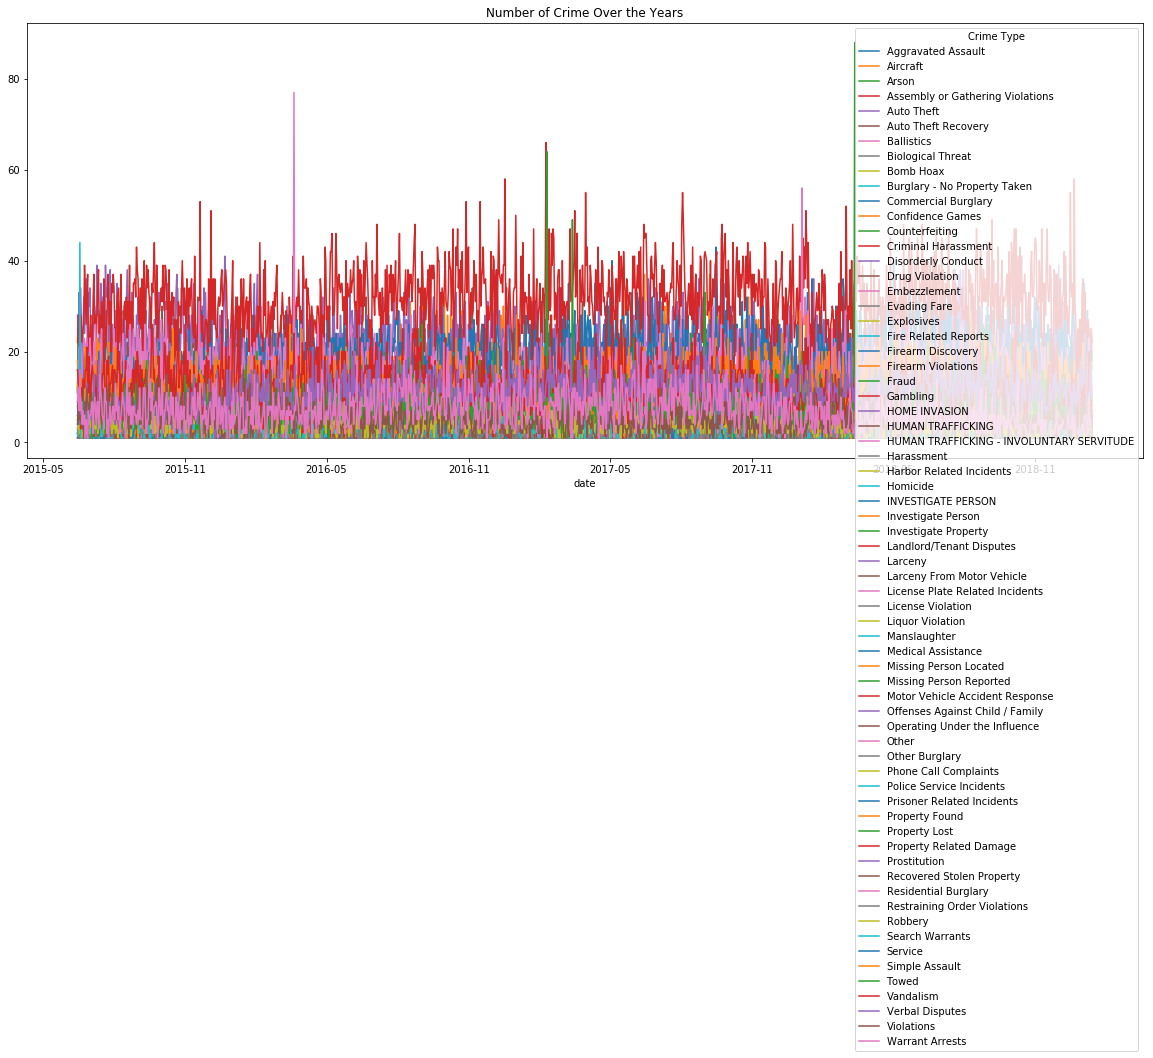

In [386]:
fig = plt.figure(figsize=(20,8))

crime[['Aggravated Assault', 'Aircraft', 'Arson',
       'Assembly or Gathering Violations', 'Auto Theft', 'Auto Theft Recovery',
       'Ballistics', 'Biological Threat', 'Bomb Hoax',
       'Burglary - No Property Taken', 'Commercial Burglary',
       'Confidence Games', 'Counterfeiting', 'Criminal Harassment',
       'Disorderly Conduct', 'Drug Violation', 'Embezzlement', 'Evading Fare',
       'Explosives', 'Fire Related Reports', 'Firearm Discovery',
       'Firearm Violations', 'Fraud', 'Gambling', 'HOME INVASION',
       'HUMAN TRAFFICKING', 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
       'Harassment', 'Harbor Related Incidents', 'Homicide',
       'INVESTIGATE PERSON', 'Investigate Person', 'Investigate Property',
       'Landlord/Tenant Disputes', 'Larceny', 'Larceny From Motor Vehicle',
       'License Plate Related Incidents', 'License Violation',
       'Liquor Violation', 'Manslaughter', 'Medical Assistance',
       'Missing Person Located', 'Missing Person Reported',
       'Motor Vehicle Accident Response', 'Offenses Against Child / Family',
       'Operating Under the Influence', 'Other', 'Other Burglary',
       'Phone Call Complaints', 'Police Service Incidents',
       'Prisoner Related Incidents', 'Property Found', 'Property Lost',
       'Property Related Damage', 'Prostitution', 'Recovered Stolen Property',
       'Residential Burglary', 'Restraining Order Violations', 'Robbery',
       'Search Warrants', 'Service', 'Simple Assault', 'Towed', 'Vandalism',
       'Verbal Disputes', 'Violations', 'Warrant Arrests']].plot(title = "Number of Crime Over the Years",ax = plt.gca())

Over the years we can see that total crimes by crime types went up and downs. There is no upward or downward trend in crime.

In [387]:
# Average crime over the years
crimedata = crime[['Aggravated Assault', 'Aircraft', 'Arson',
       'Assembly or Gathering Violations', 'Auto Theft', 'Auto Theft Recovery',
       'Ballistics', 'Biological Threat', 'Bomb Hoax',
       'Burglary - No Property Taken', 'Commercial Burglary',
       'Confidence Games', 'Counterfeiting', 'Criminal Harassment',
       'Disorderly Conduct', 'Drug Violation', 'Embezzlement', 'Evading Fare',
       'Explosives', 'Fire Related Reports', 'Firearm Discovery',
       'Firearm Violations', 'Fraud', 'Gambling', 'HOME INVASION',
       'HUMAN TRAFFICKING', 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
       'Harassment', 'Harbor Related Incidents', 'Homicide',
       'INVESTIGATE PERSON', 'Investigate Person', 'Investigate Property',
       'Landlord/Tenant Disputes', 'Larceny', 'Larceny From Motor Vehicle',
       'License Plate Related Incidents', 'License Violation',
       'Liquor Violation', 'Manslaughter', 'Medical Assistance',
       'Missing Person Located', 'Missing Person Reported',
       'Motor Vehicle Accident Response', 'Offenses Against Child / Family',
       'Operating Under the Influence', 'Other', 'Other Burglary',
       'Phone Call Complaints', 'Police Service Incidents',
       'Prisoner Related Incidents', 'Property Found', 'Property Lost',
       'Property Related Damage', 'Prostitution', 'Recovered Stolen Property',
       'Residential Burglary', 'Restraining Order Violations', 'Robbery',
       'Search Warrants', 'Service', 'Simple Assault', 'Towed', 'Vandalism',
       'Verbal Disputes', 'Violations', 'Warrant Arrests']]

In [388]:
avgcrime = pd.DataFrame(crimedata.mean())

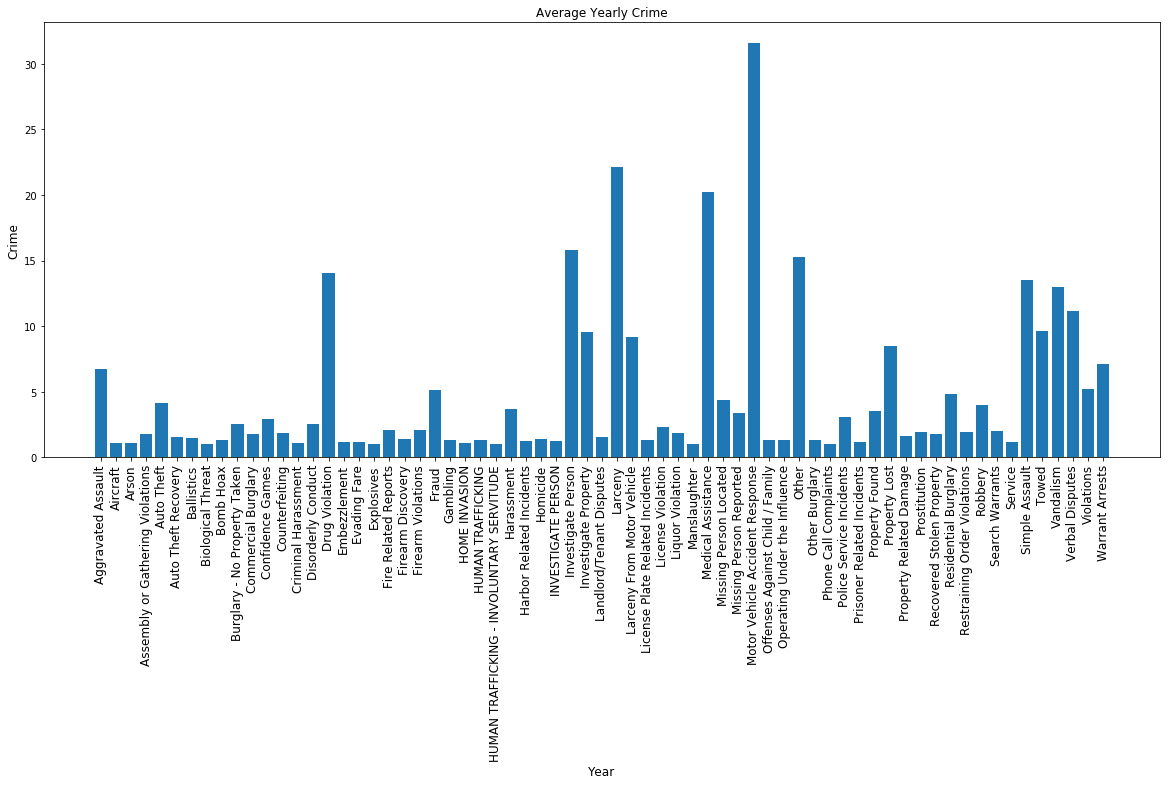

In [389]:
plt.figure(figsize=(20,8))
plt.bar(avgcrime.index, avgcrime[0])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crime', fontsize=12)
plt.xticks(avgcrime.index, fontsize=12, rotation=90)
plt.title('Average Yearly Crime')
plt.savefig("average yearly crime.png")
plt.show()


In [ ]:
Average highest crime were Motor Vehicle Accident Response,Vandalism,Other,
Drug Violation,Auto Theft,Aggravated Assault
,

In [390]:
md.index = md.date

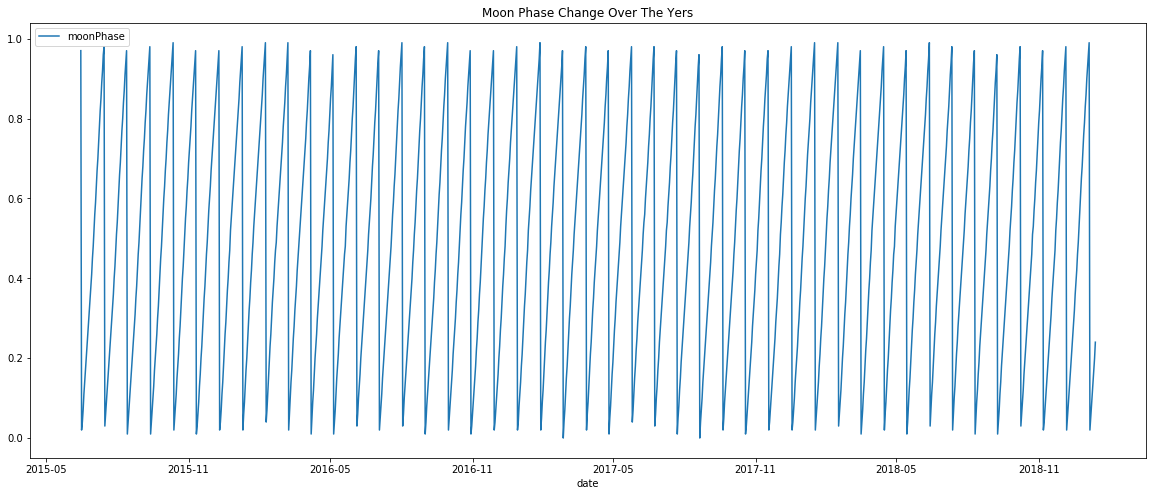

In [391]:
fig = plt.figure(figsize=(20,8))

md[['moonPhase']].plot(title = "Moon Phase Change Over The Yers", ax = plt.gca())

Moon cycle changes peridiocally

In [392]:
total_crime.head()

,Frequency,date,moonPhase
date,,,
2015-06-15,249,2015-06-15,0.97
2015-06-16,258,2015-06-16,0.02
2015-06-17,234,2015-06-17,0.04
2015-06-18,294,2015-06-18,0.07
2015-06-19,289,2015-06-19,0.11


In [393]:
wd.head()

,date,moonPhase
0,2015-06-15,0.97
1,2015-06-16,0.02
2,2015-06-17,0.04
3,2015-06-18,0.07
4,2015-06-19,0.11


In [394]:
# calculate total crime 
total_crime = criemelong.groupby('date').sum()

In [395]:
total_crime['date'] = total_crime.index

In [396]:
total_crime.head()

,Frequency,date
date,,
2015-06-15,249,2015-06-15
2015-06-16,258,2015-06-16
2015-06-17,234,2015-06-17
2015-06-18,294,2015-06-18
2015-06-19,289,2015-06-19


In [397]:

# Add moonphase
total_crime['moonPhase'] = md.moonPhase.values

In [398]:
total_crime.head()

,Frequency,date,moonPhase
date,,,
2015-06-15,249,2015-06-15,0.97
2015-06-16,258,2015-06-16,0.02
2015-06-17,234,2015-06-17,0.04
2015-06-18,294,2015-06-18,0.07
2015-06-19,289,2015-06-19,0.11


# Yearly total crime data

In [399]:
criemelong.date = pd.to_datetime(criemelong.date)

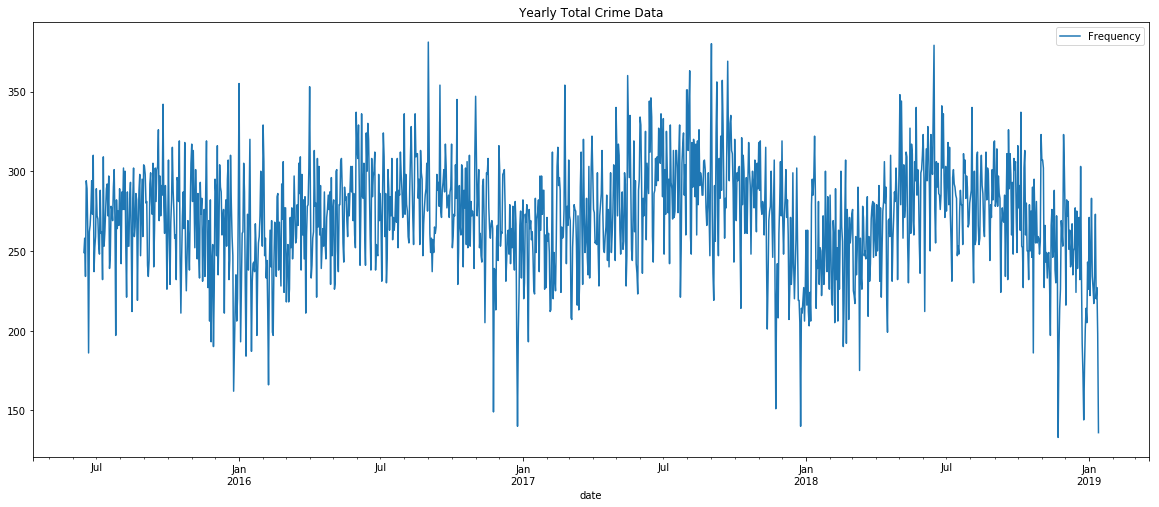

In [400]:
fig = plt.figure(figsize=(20,8))

# Plot Yearly Total Crime Data
criemelong.groupby('date').sum().plot(title = "Yearly Total Crime Data", ax = plt.gca())

There is cyclical trend in total crime . Total crime increasesase during july-august and decrases during november, december , january.

In [401]:
# crime data line plot grouped by moonphase type

# Average crime by moon phase

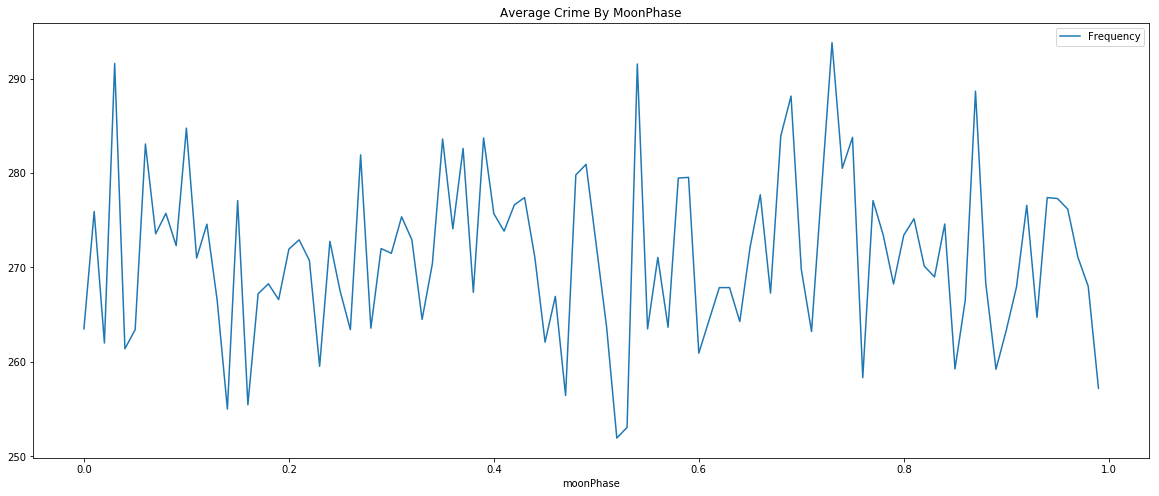

In [402]:
fig = plt.figure(figsize=(20,8))

total_crime.groupby('moonPhase').mean().plot(title = "Average Crime By MoonPhase",ax = plt.gca())

From the graph we can see that crime rate changes due to moon phase value change

In [403]:
md.groupby('moonPhase').sum().head()

,Aggravated Assault,Aircraft,Arson,Assembly or Gathering Violations,Auto Theft,Auto Theft Recovery,Ballistics,Biological Threat,Bomb Hoax,Burglary - No Property Taken,...,Restraining Order Violations,Robbery,Search Warrants,Service,Simple Assault,Towed,Vandalism,Verbal Disputes,Violations,Warrant Arrests
moonPhase,,,,,,,,,,,,,,,,,,,,,
0.00,15.0,1.0,1.0,1.0,13.0,3.0,3.0,0.0,0.0,0.0,...,10.0,4.0,0.0,0.0,23.0,30.0,25.0,33.0,8.0,13.0
0.01,100.0,0.0,0.0,15.0,73.0,14.0,9.0,0.0,0.0,0.0,...,18.0,49.0,7.0,5.0,205.0,158.0,208.0,146.0,64.0,88.0
0.02,117.0,2.0,1.0,16.0,62.0,14.0,21.0,0.0,1.0,0.0,...,25.0,89.0,14.0,4.0,271.0,154.0,269.0,204.0,86.0,127.0
0.03,62.0,1.0,0.0,8.0,56.0,9.0,8.0,0.0,0.0,0.0,...,15.0,47.0,14.0,6.0,134.0,99.0,140.0,124.0,54.0,93.0
0.04,100.0,1.0,0.0,15.0,53.0,16.0,17.0,0.0,0.0,0.0,...,26.0,77.0,18.0,2.0,244.0,193.0,204.0,209.0,101.0,117.0


In [409]:
md['total'] = total_crime.Frequency

In [410]:
# Write data to file
md.to_csv("final data.csv")